## Exploration

Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal. Use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [1]:
# manipulations imports
import pandas as pd
import numpy as np

# viz imports
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#stats imports
from scipy.stats import pearsonr, spearmanr, ttest_ind

# my imports
import wrangle
import explore

In [2]:
df =  wrangle.wrangle_zillow()

In [3]:
train, validate, test = wrangle.split_data(df)

train: 1284141 (60.0% of 2140235)
validate: 428047 (20.0% of 2140235)
test: 428047 (20.0% of 2140235)


### 1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.
 

In [48]:
def plot_variable_pairs(df, sample_size=1_000):
    df_sample = df.sample(sample_size)
    sns.set(style='ticks', context='talk')
    plt.style.use('fast')
    sns.pairplot(df_sample, kind='reg', plot_kws={'scatter_kws': {'s': 1, 'color': 'red'}})
    plt.show()


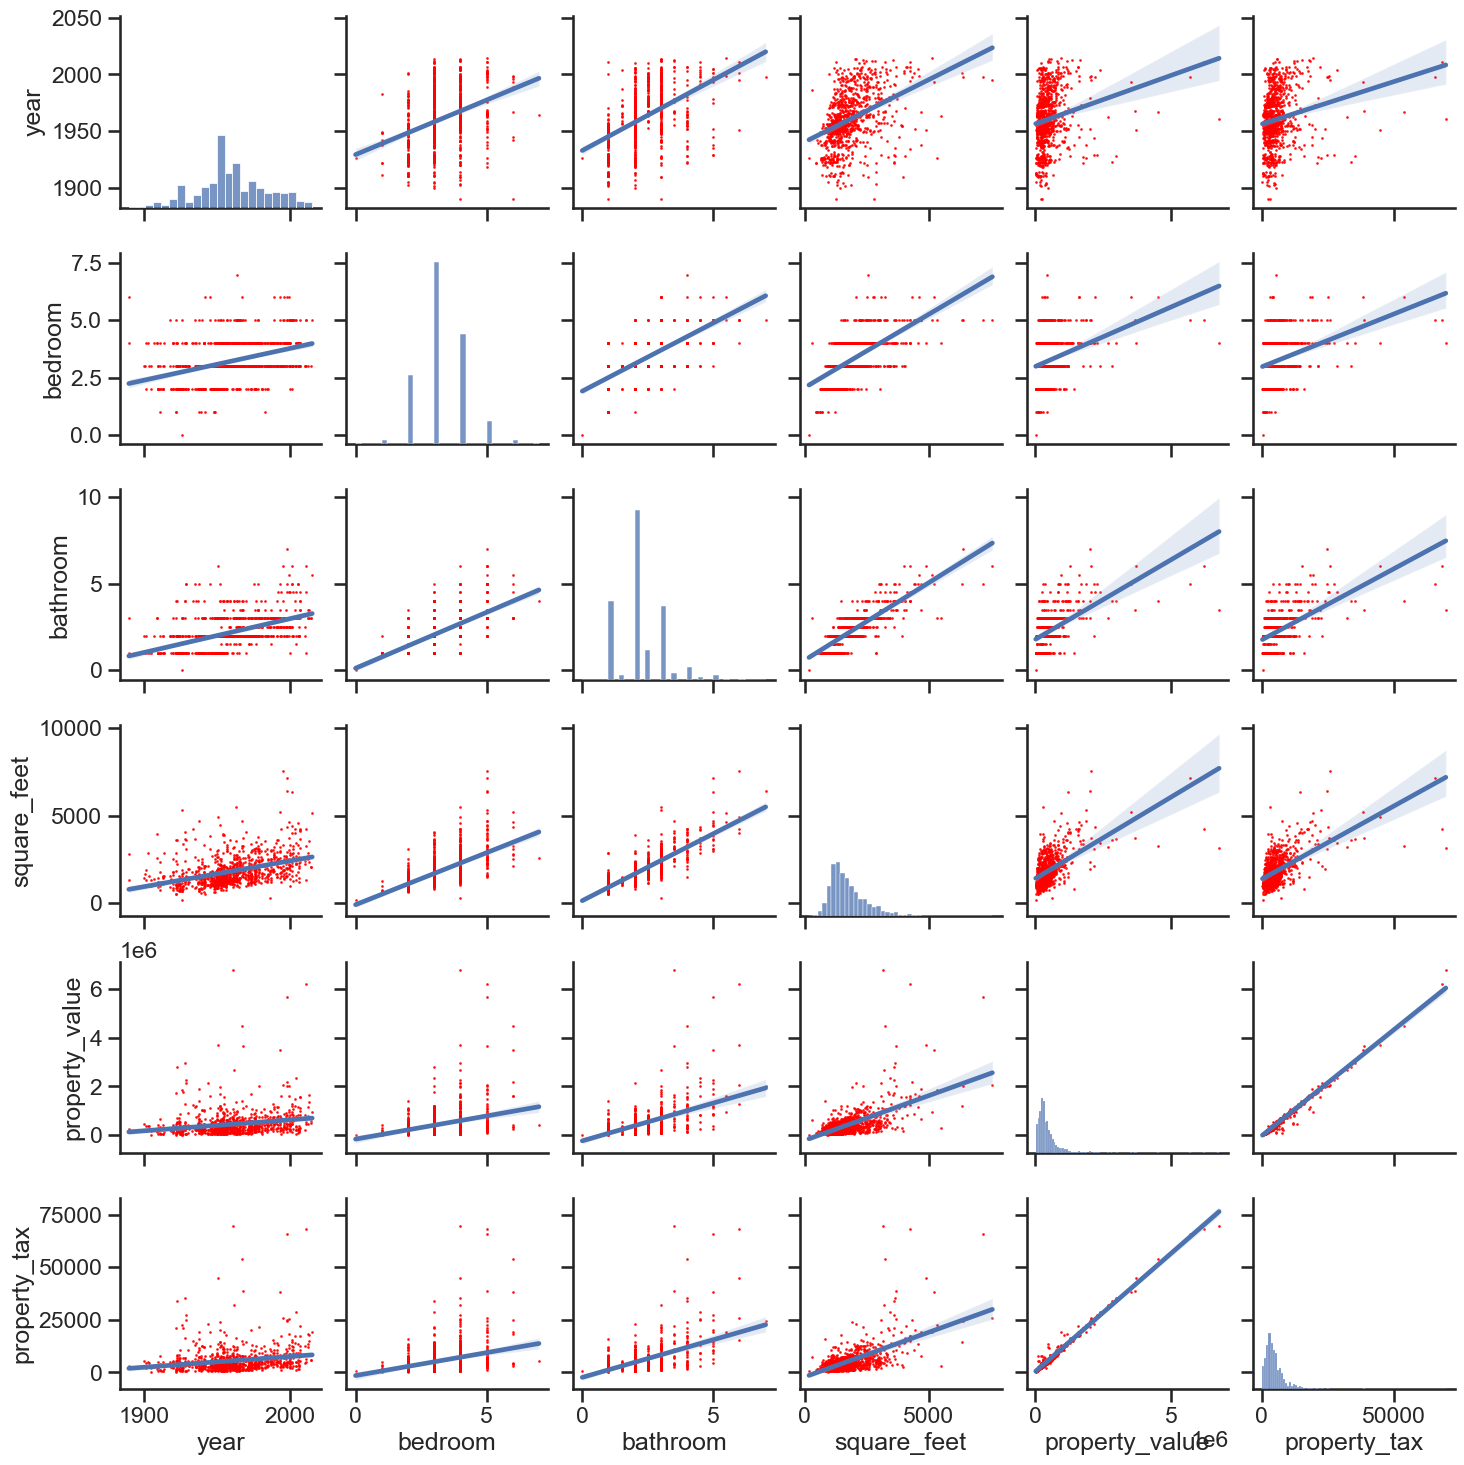

In [49]:
 plot_variable_pairs(train)

In [ ]:
# OR

In [8]:
def plot_variable_pairs(df, sample_size=1_000):
    df_sample = df.sample(sample_size)
    
    g=sns.PairGrid(df_sample)
    g.map_diag(plt.hist)
    g.map_offdiag(sns.regplot)
    
#     sns.set(style='ticks', context='talk')
#     plt.style.use('fast')
#     sns.pairplot(df_sample, kind='reg', plot_kws={'scatter_kws': {'s': 1, 'color': 'lightcoral'}})
    plt.show()


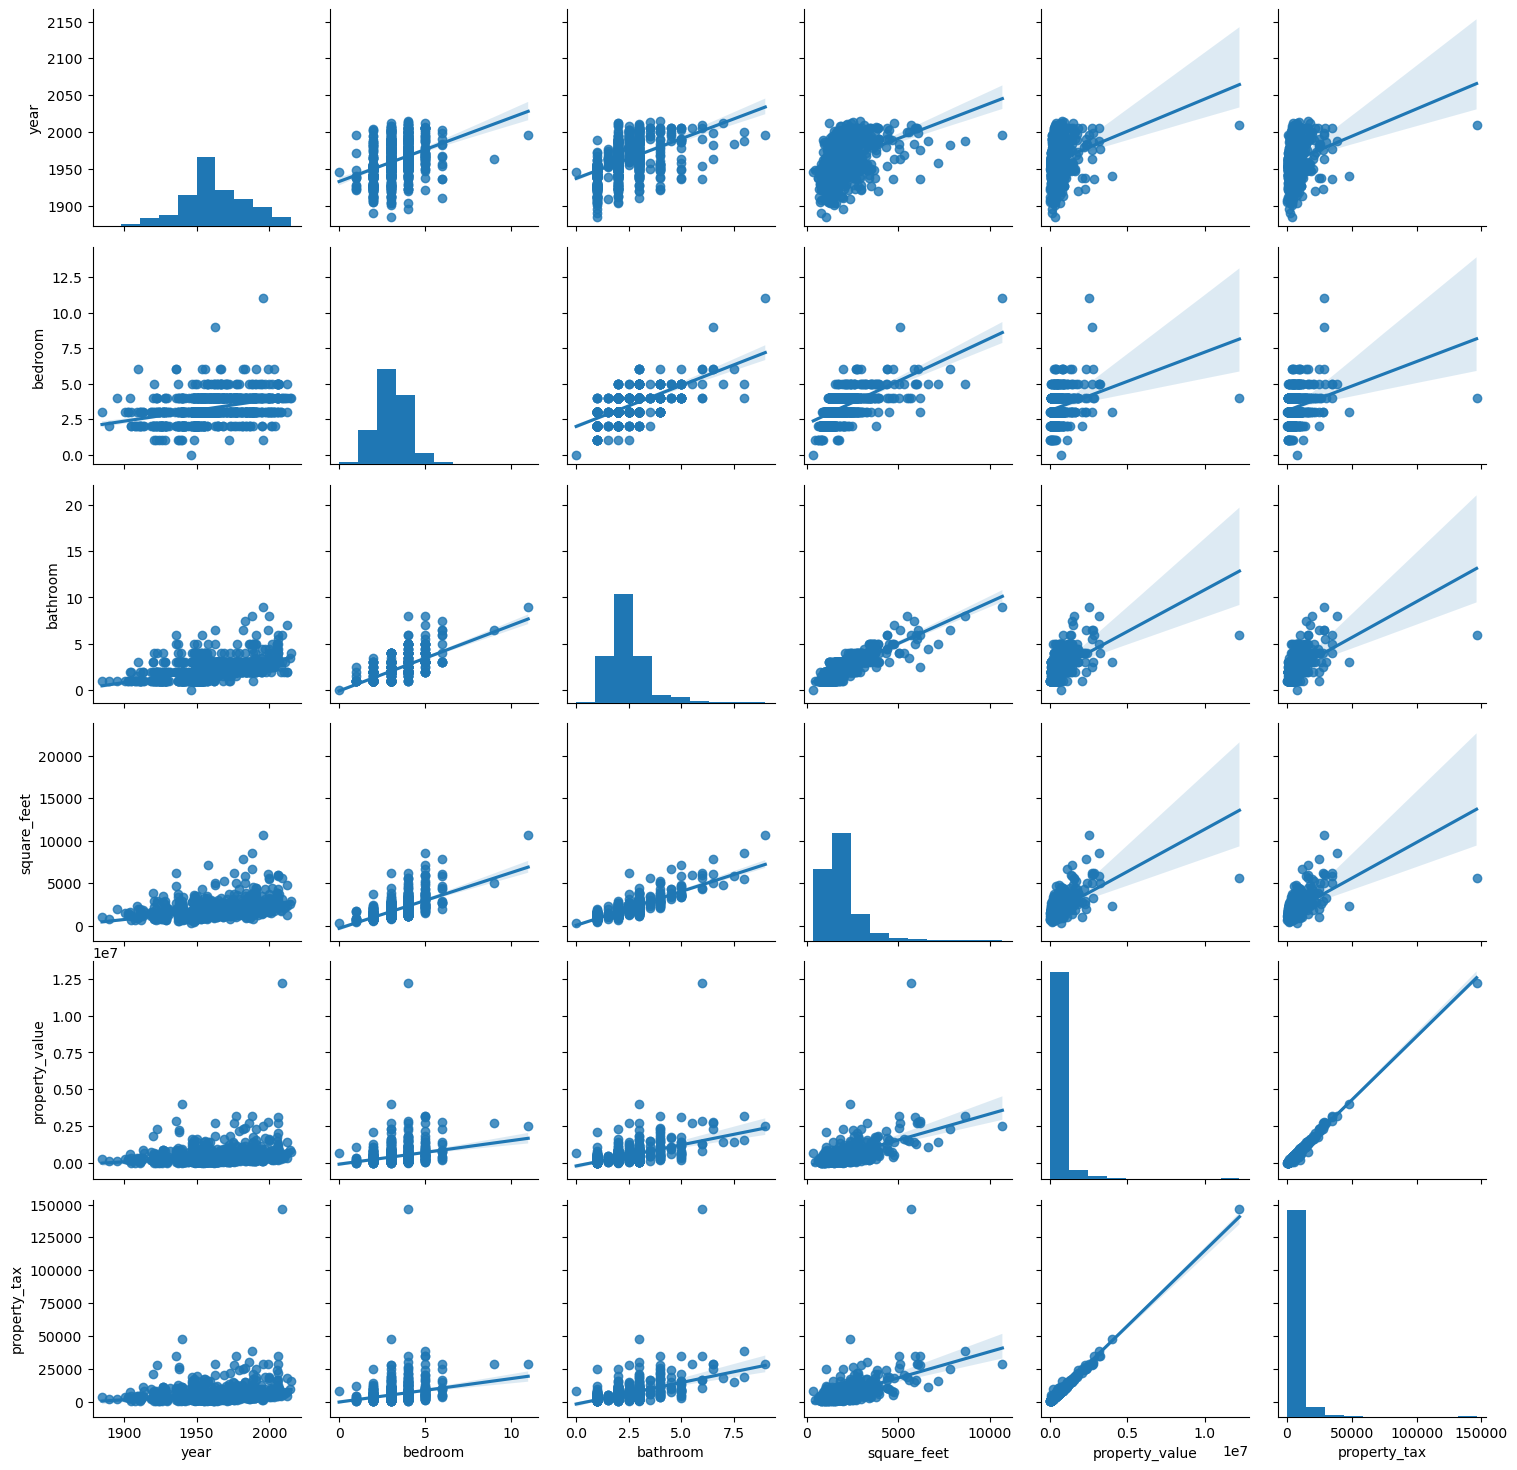

In [9]:
plot_variable_pairs(train)

 
### 2. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.
 

In [52]:
cat_col= train [['county', 'bedroom', 'bathroom']]
con_col= train[['square_feet', 'property_value', 'year', 'property_tax']]


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_and_continuous_vars(df, cat_cols, con_cols, sample_size=1000):
    """
    Plot three different visualizations for the relationship between
    categorical variables and continuous variables.

    Parameters:
    - df: DataFrame, the input dataframe.
    - cat_cols: list, names of columns holding categorical variables.
    - con_cols: list, names of columns holding continuous variables.
    - sample_size: int, size of the random sample (default is 1000).
    """

    # Take a random sample of the data
    df_sample = df.sample(sample_size)

    for cat_var in cat_cols:
        for con_var in con_cols:

            # Plot 1: Boxplot
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 3, 1)
            sns.boxplot(x=cat_var, y=con_var, data=df_sample)
            plt.title(f'Boxplot of {con_var} by {cat_var}')

            # Plot 2: Violin plot
            plt.subplot(1, 3, 2)
            sns.violinplot(x=cat_var, y=con_var, data=df_sample)
            plt.title(f'Violin Plot of {con_var} by {cat_var}')

            # Plot 3: hist plot 
            plt.subplot(1, 3, 3)
            for category in df_sample[cat_var].unique():
                sns.histplot(df_sample[df_sample[cat_var] == category][con_var], label=category, alpha=0.5, kde=True)
            plt.title(f'Histogram of {con_var} by {cat_var}')
            plt.legend()

            plt.tight_layout()
            plt.show()


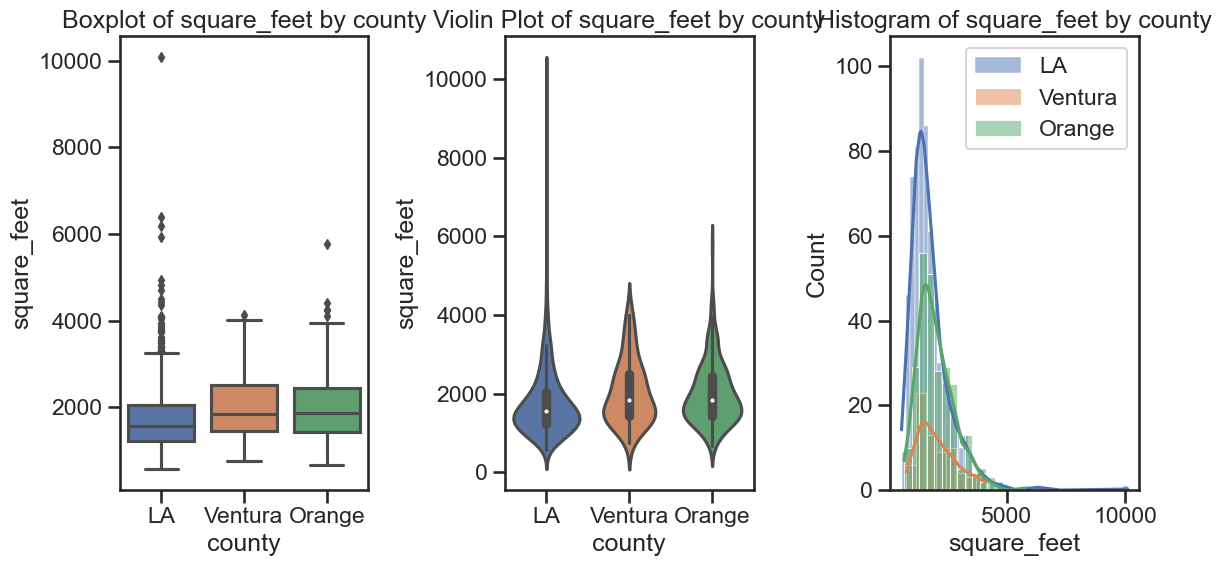

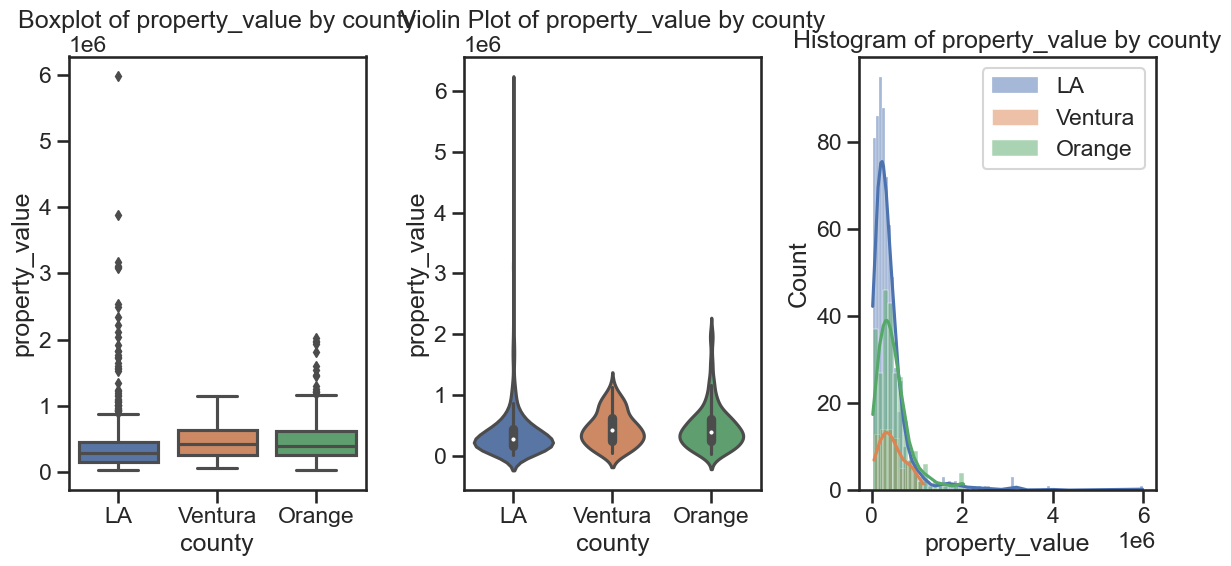

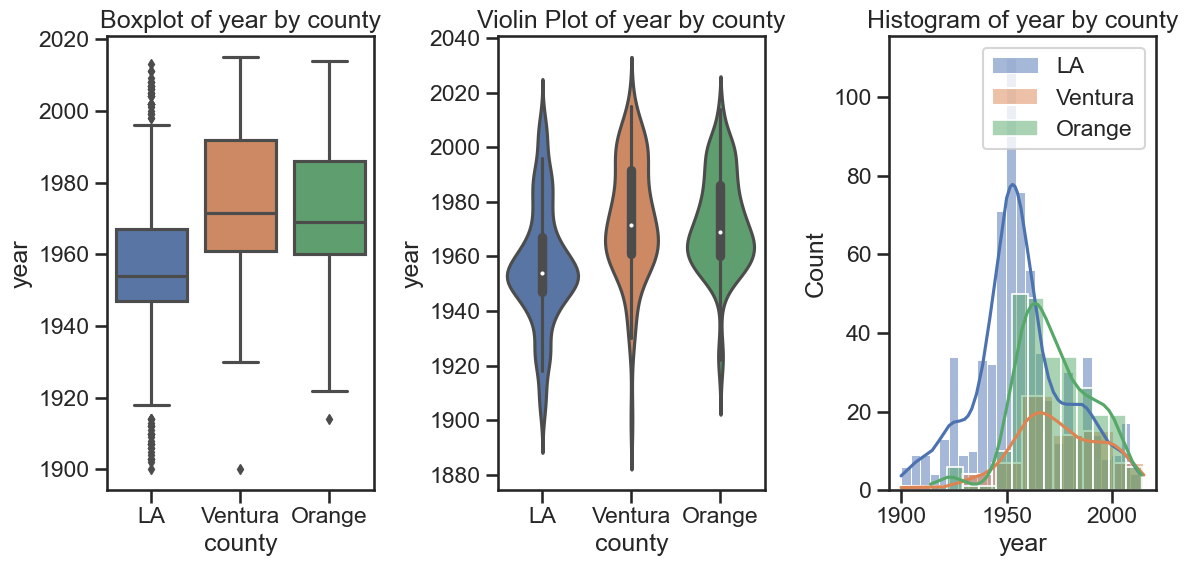

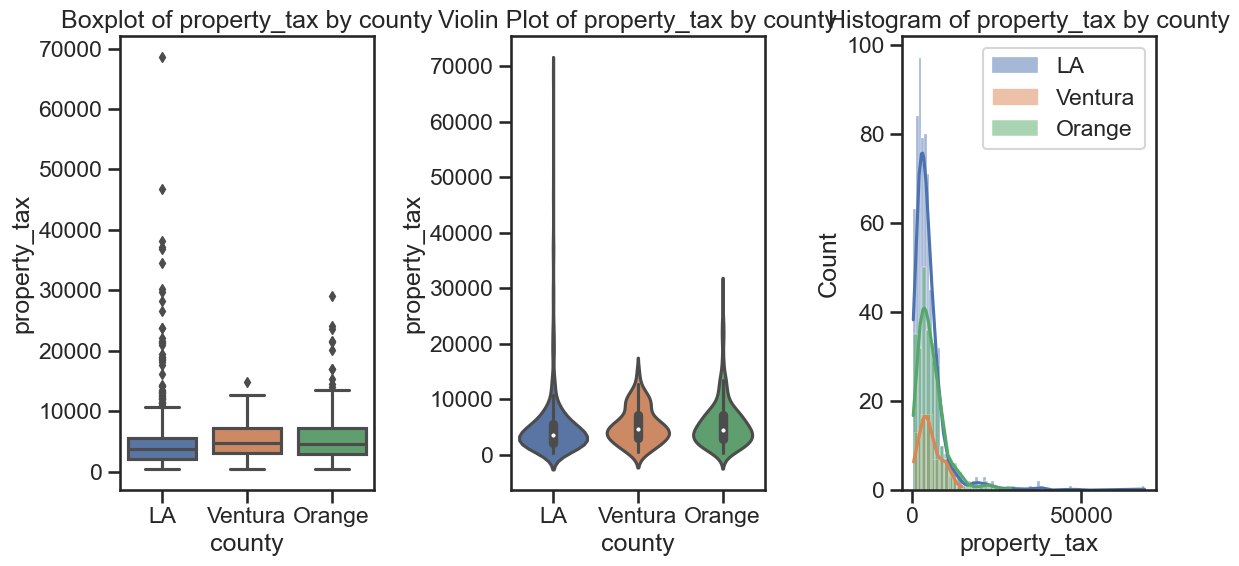

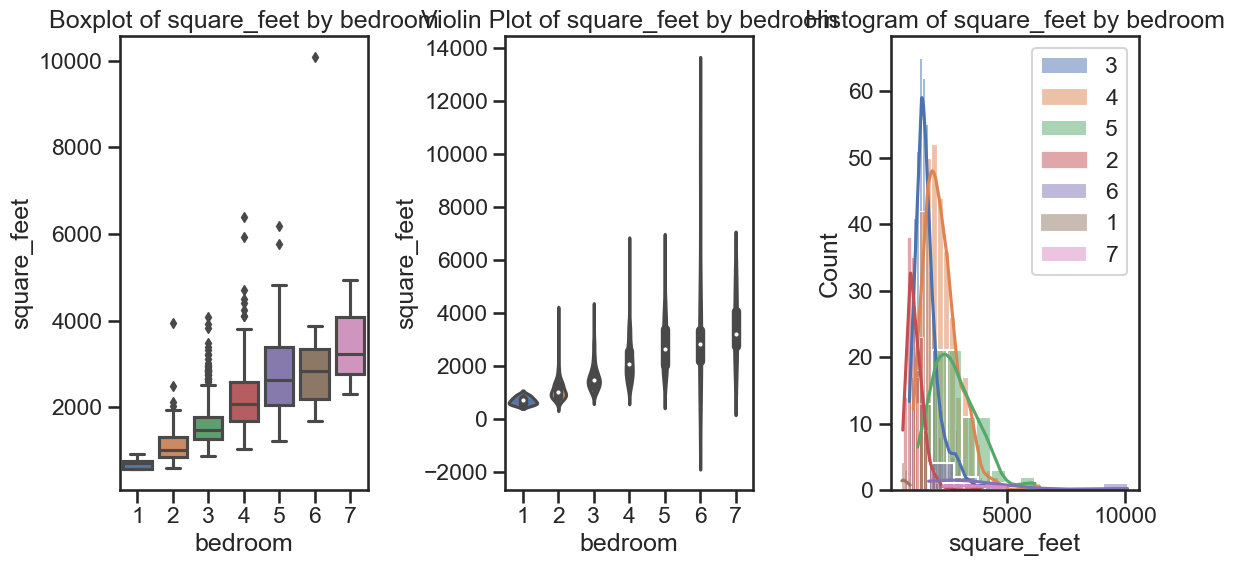

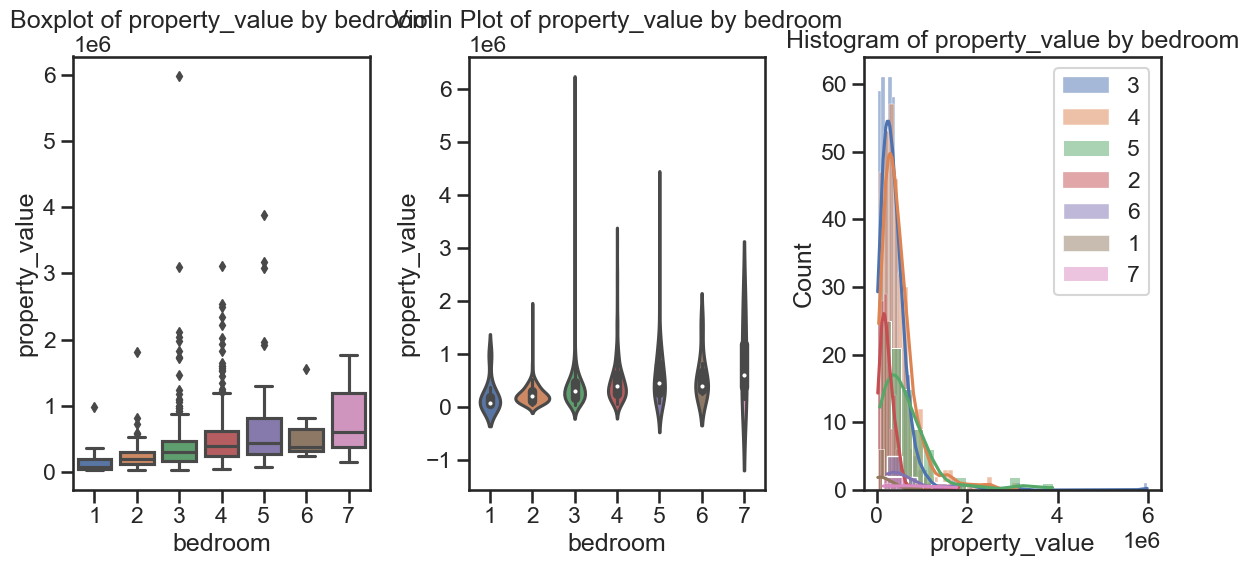

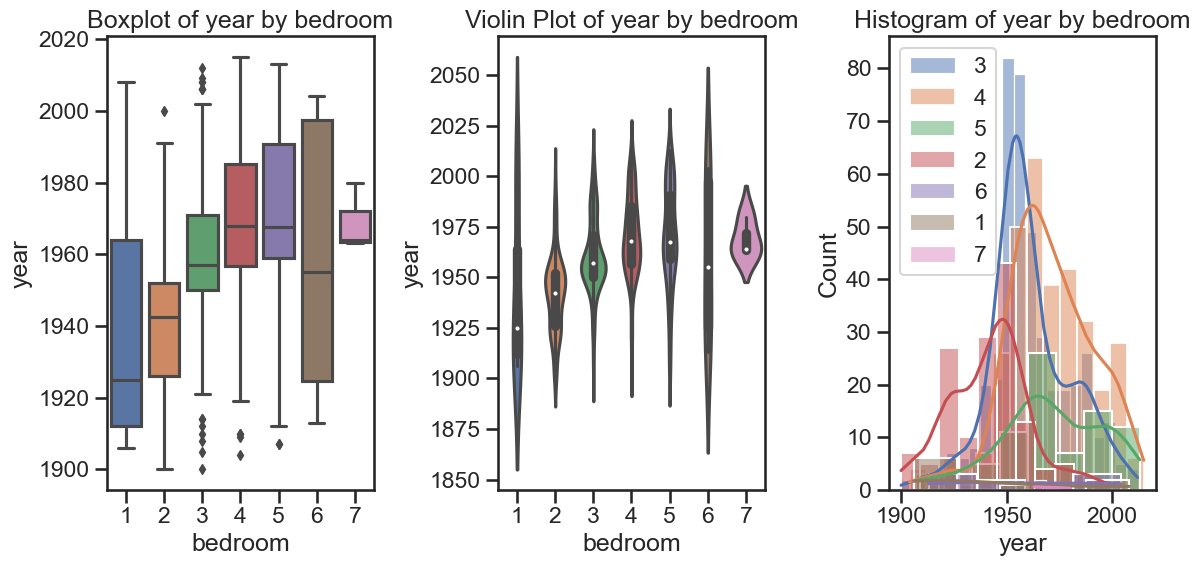

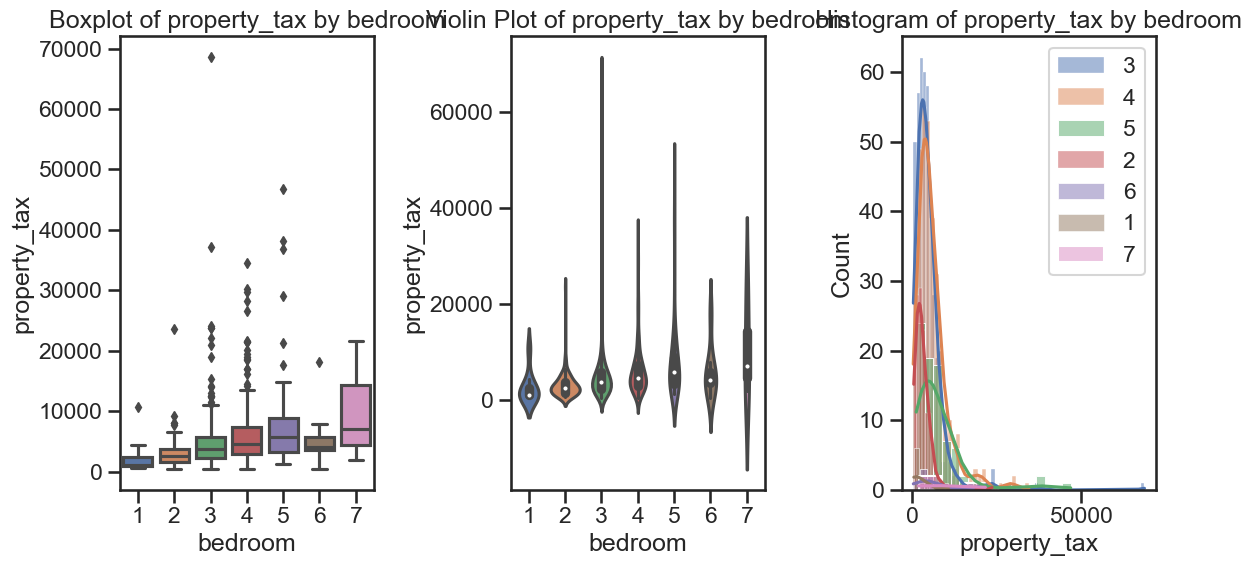

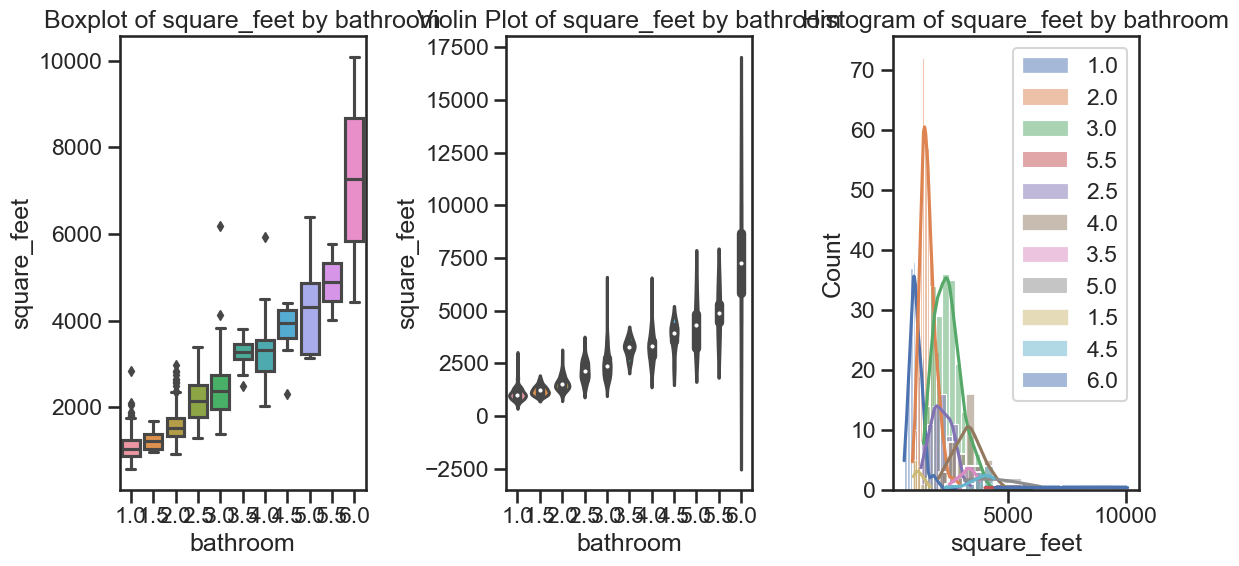

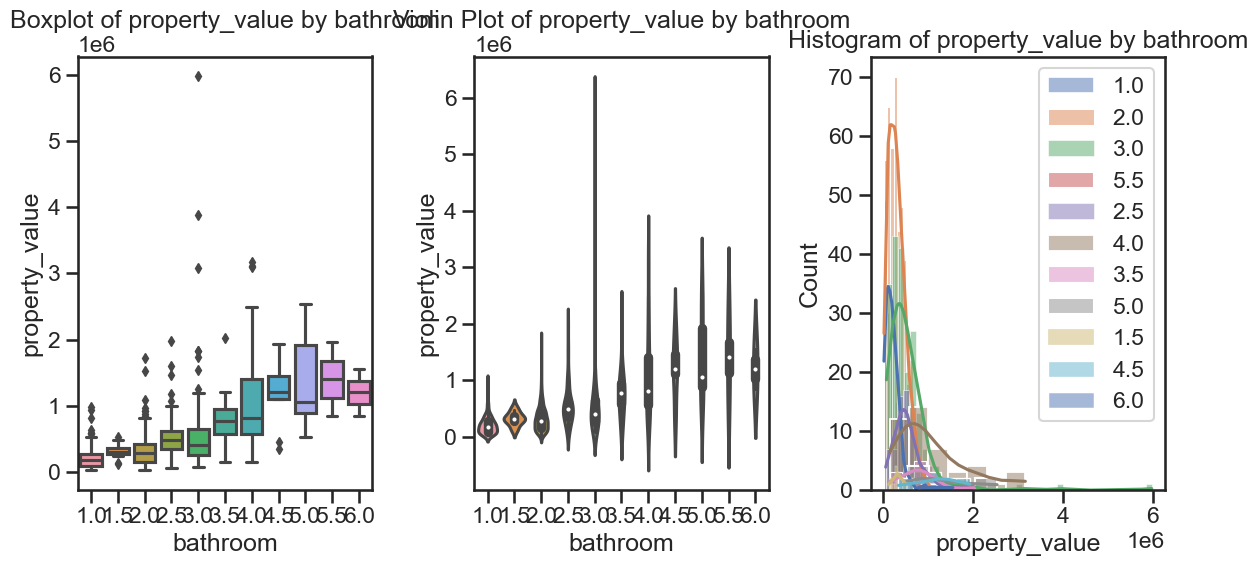

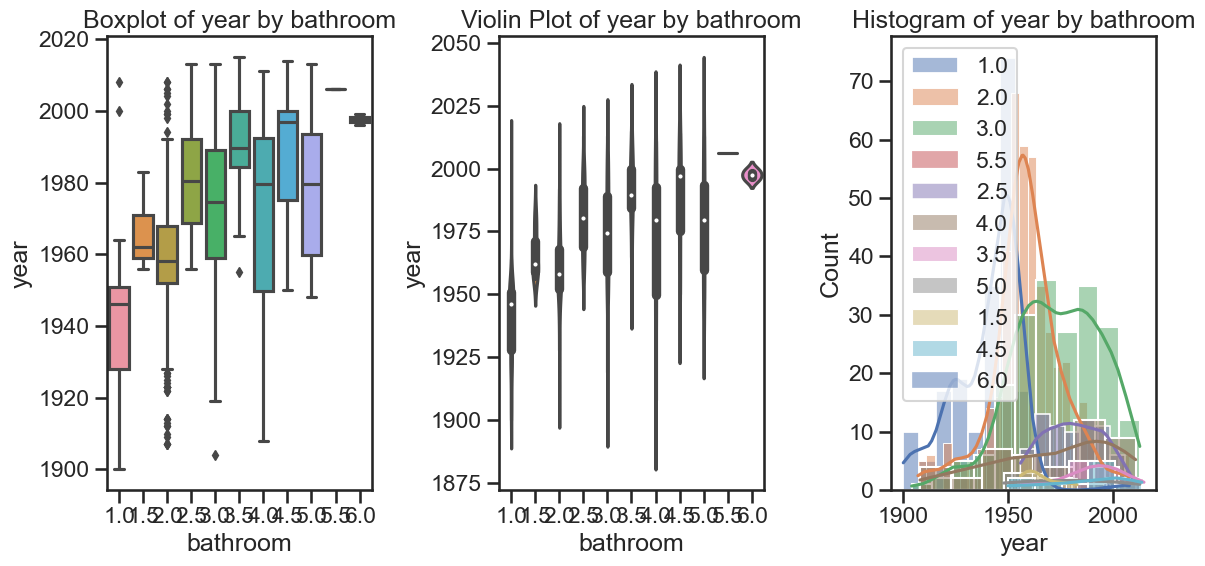

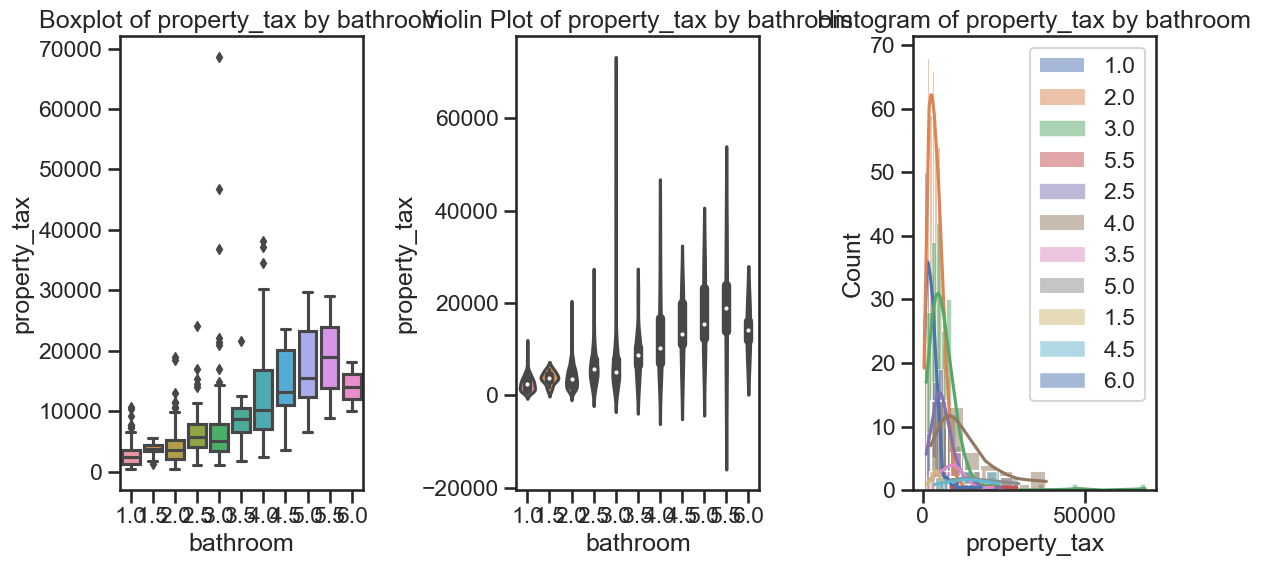

In [53]:
# use function
plot_categorical_and_continuous_vars(df, cat_cols=cat_cols, con_cols=con_cols, sample_size=1000)


 
#### 3. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.
 

In [ ]:
explore.plot_variable_pairs(train.sample(1000))

In [8]:
cat_col= train [['county', 'bedroom', 'bathroom']]
con_col= train[['square_feet', 'property_value', 'year', 'property_tax']]
explore.plot_categorical_and_continuous_vars(train.sample(1000), cat_cols=cat_col, con_cols=con_col)



 
 
#### 4. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.
 

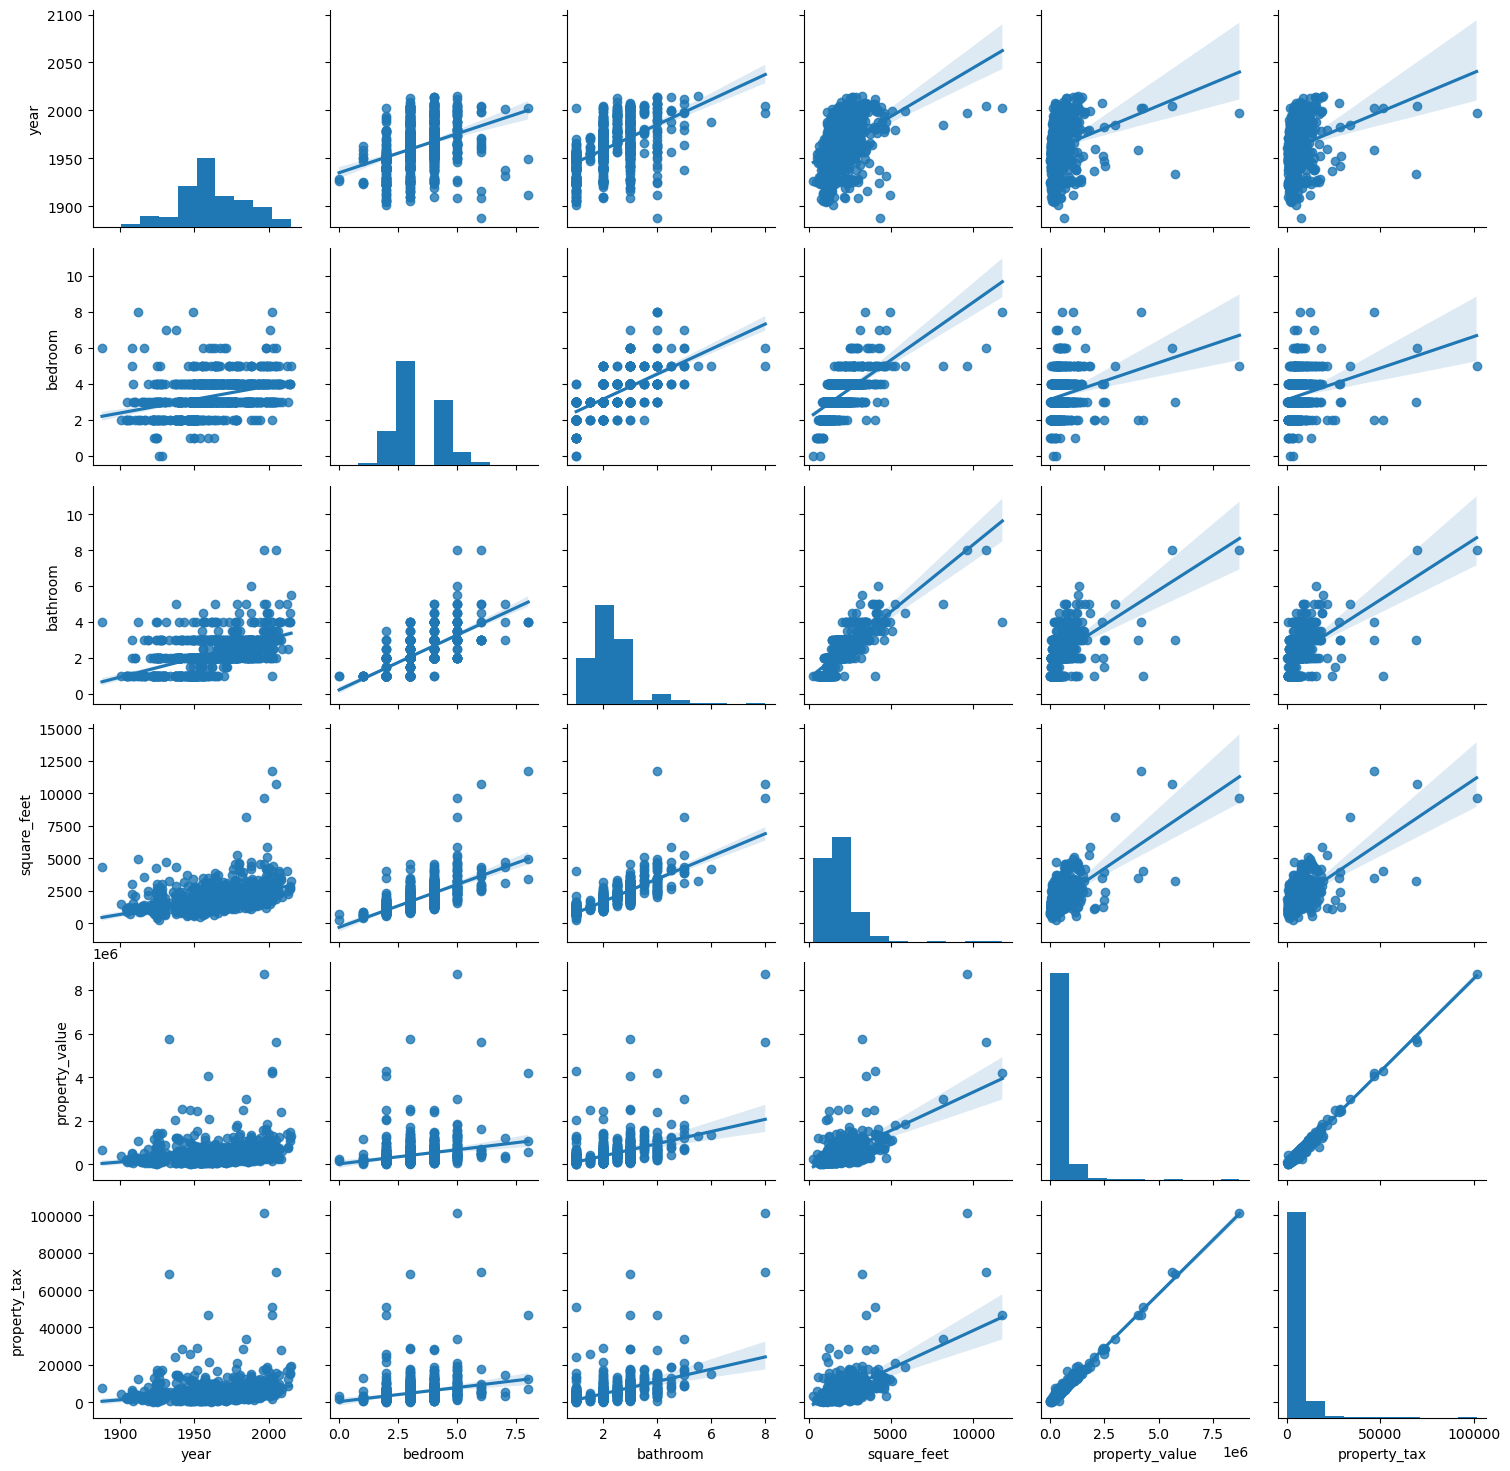

In [11]:
explore.plot_variable_pairs(train.sample(1000))

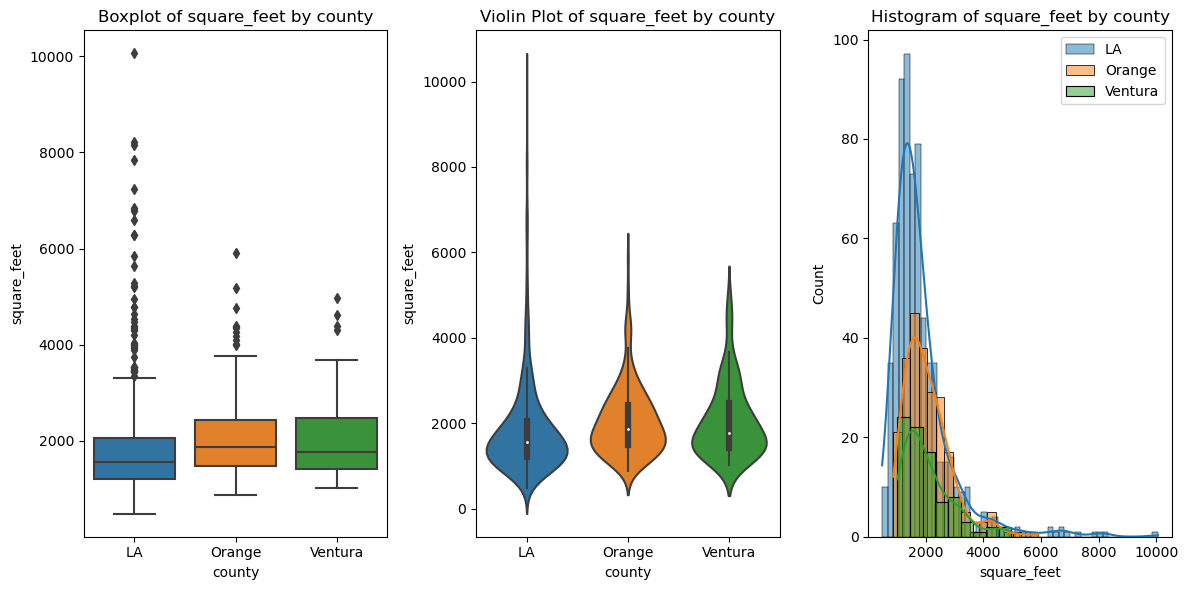

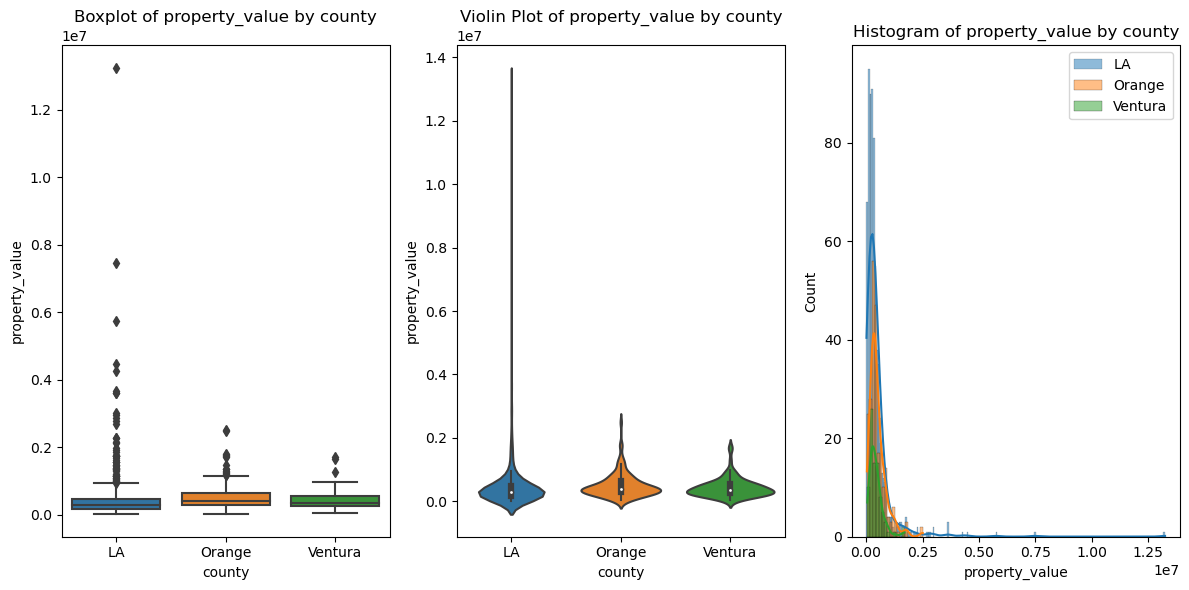

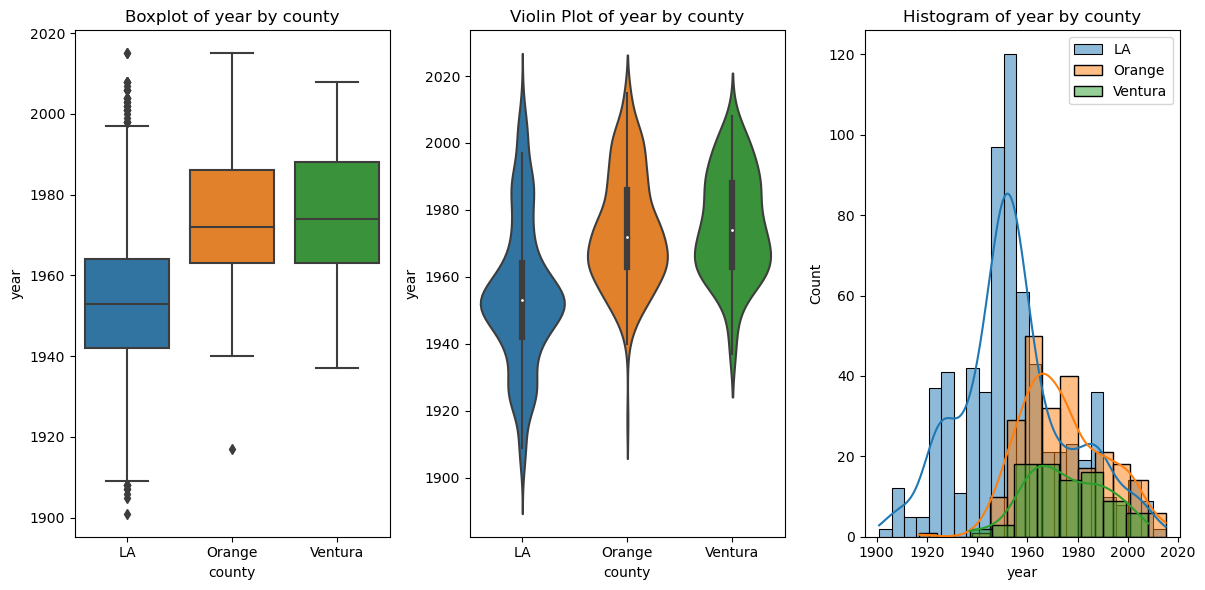

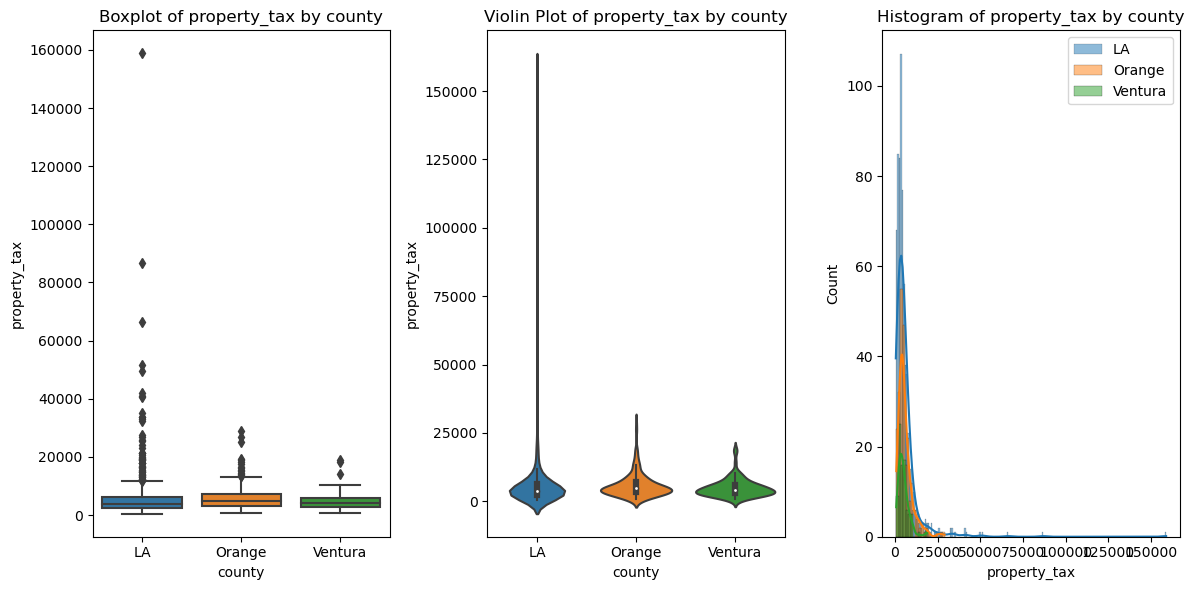

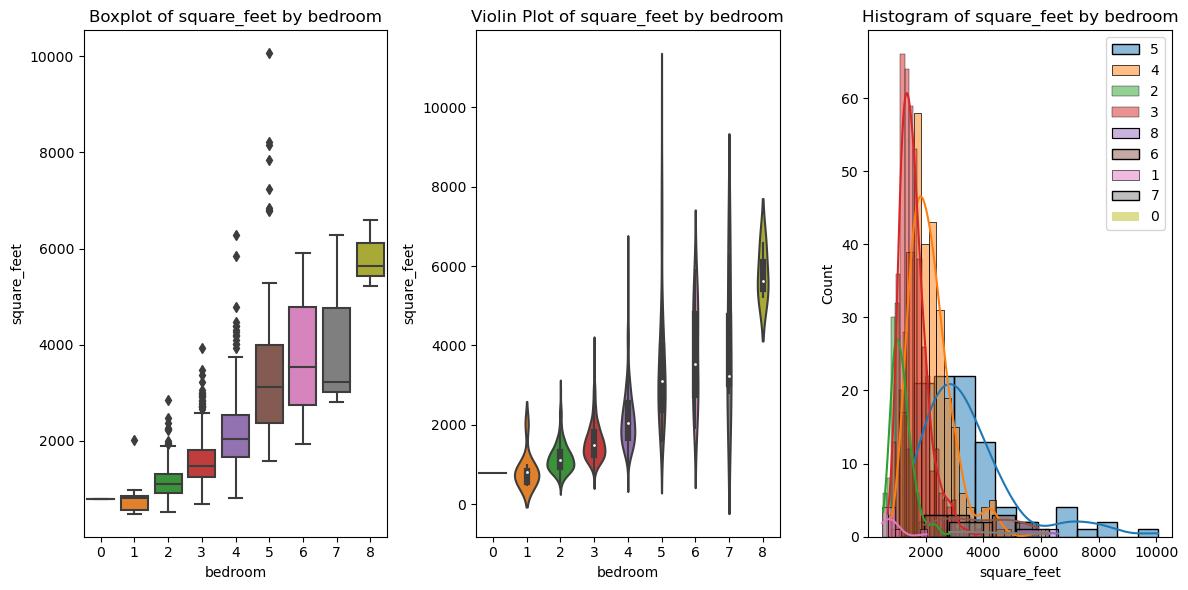

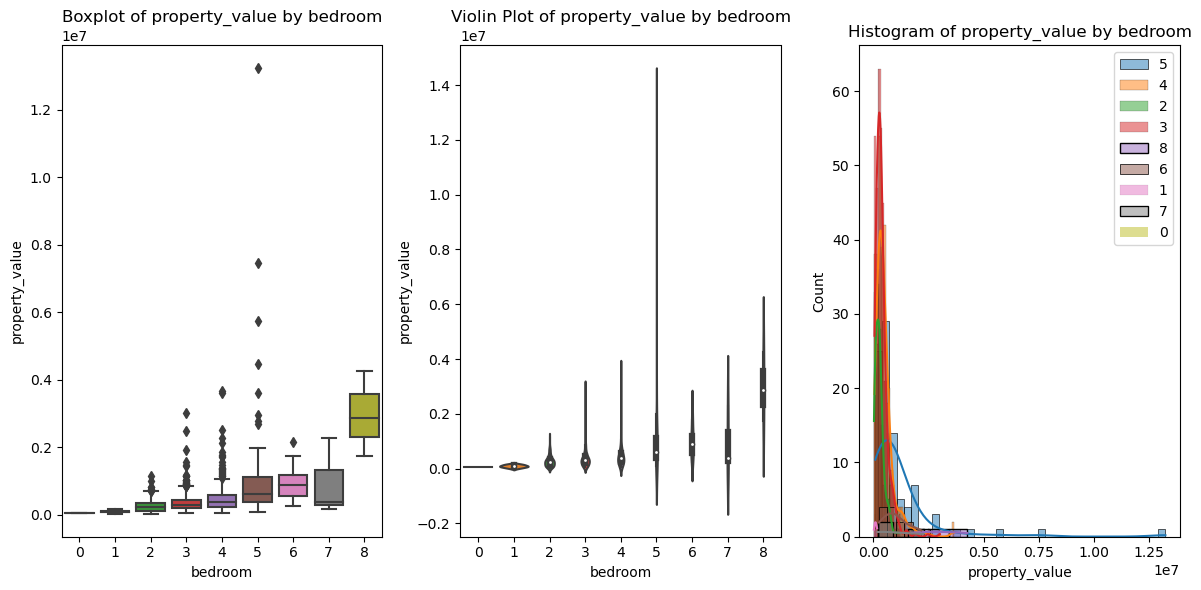

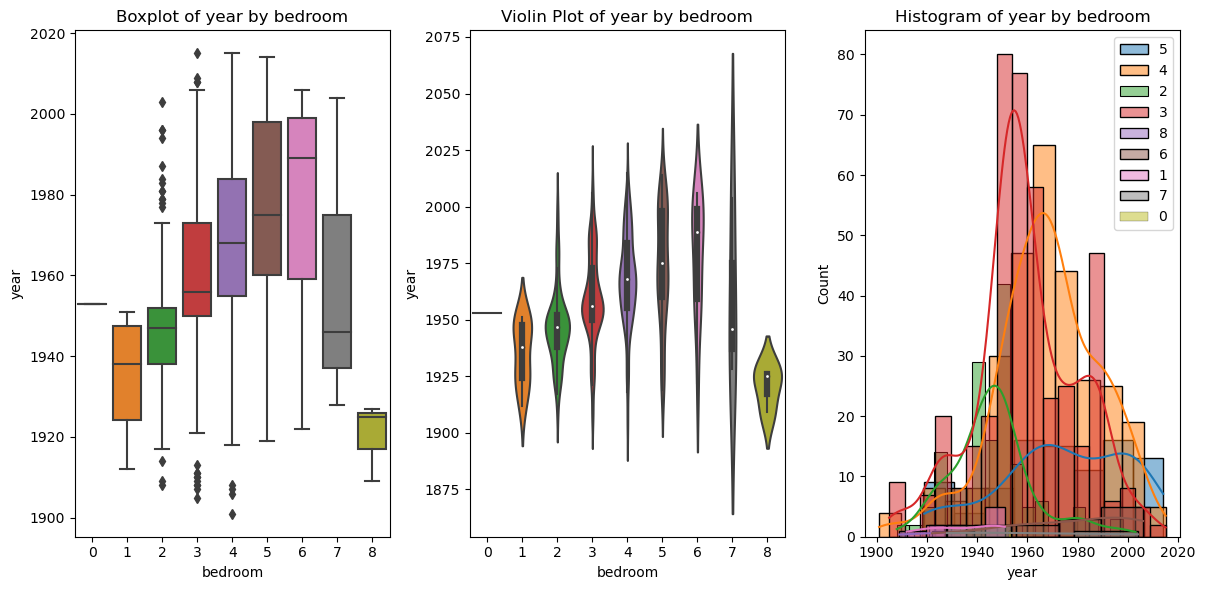

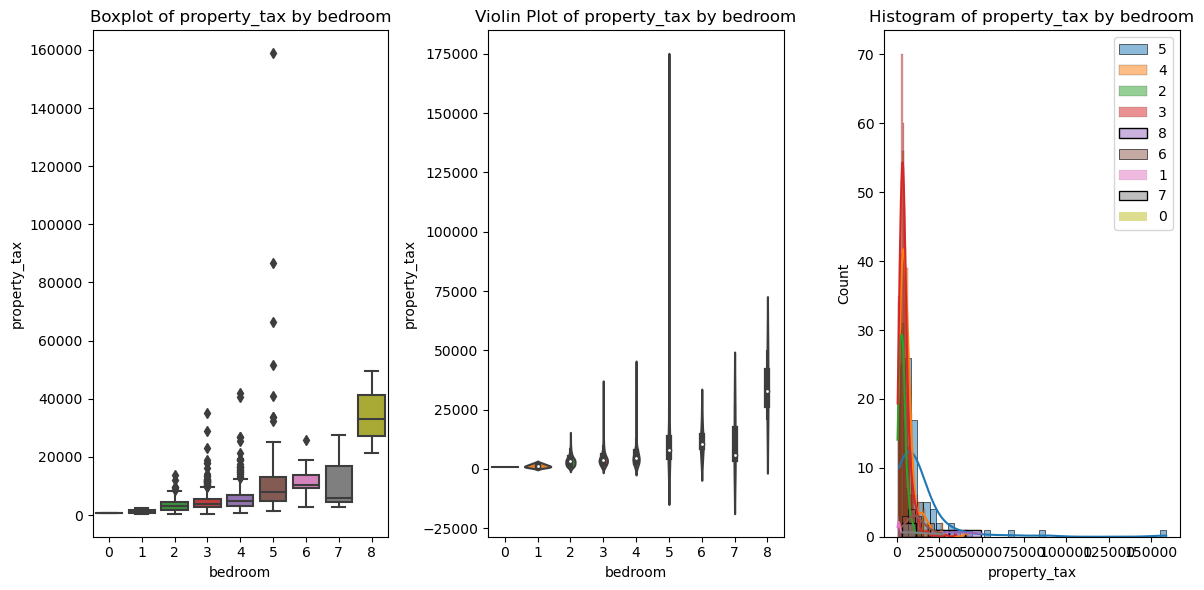

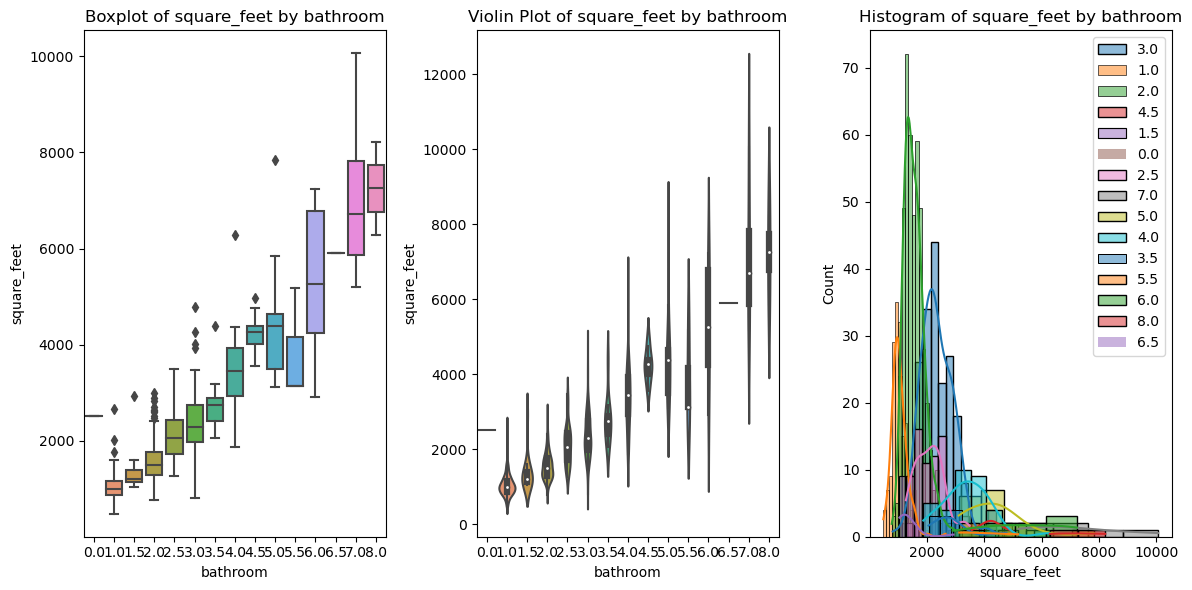

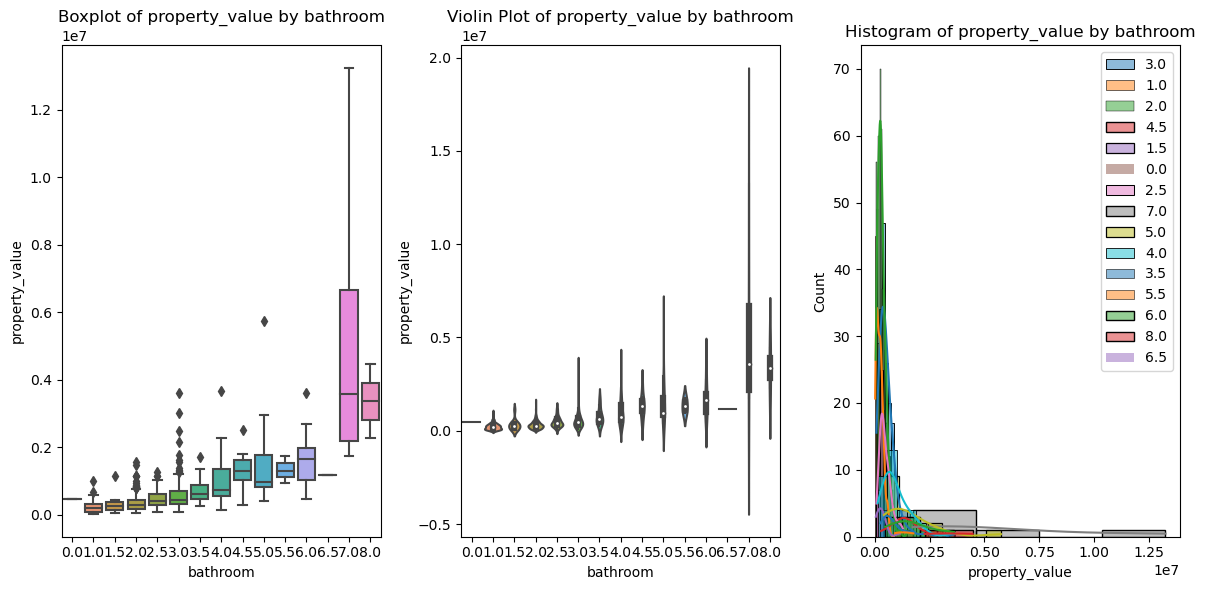

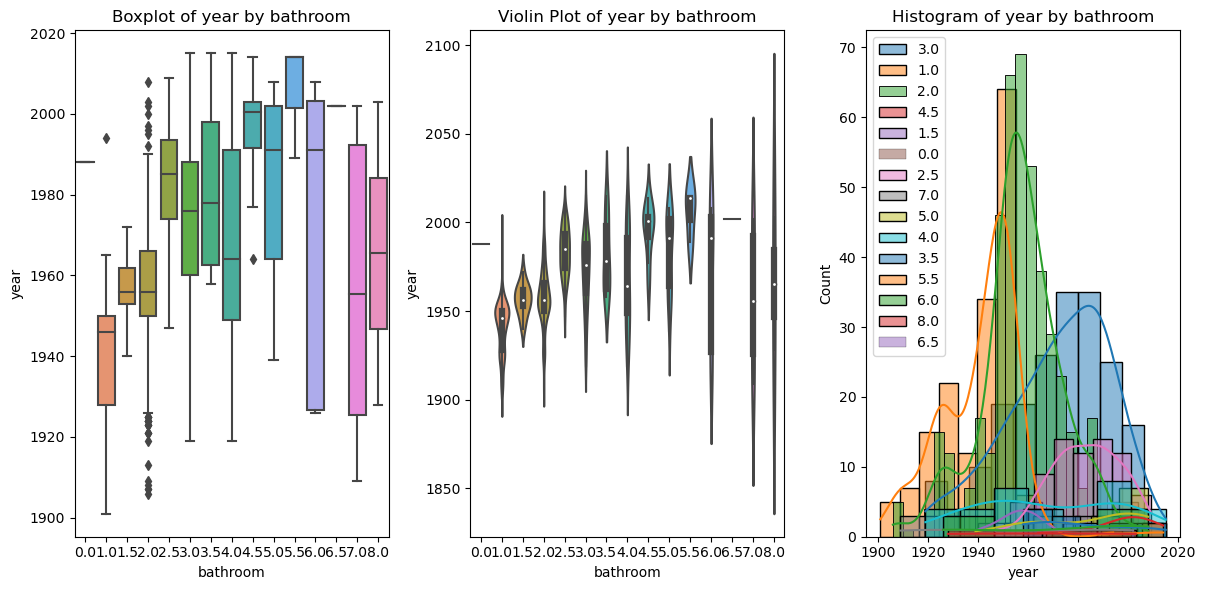

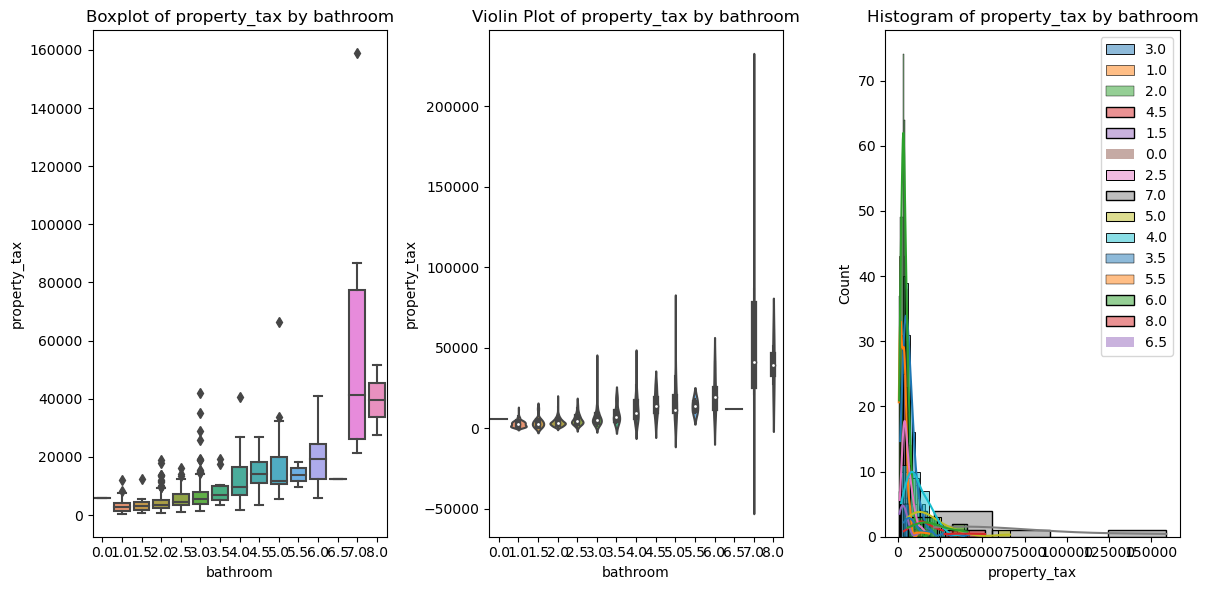

In [12]:
cat_col= train [['county', 'bedroom', 'bathroom']]
con_col= train[['square_feet', 'property_value', 'year', 'property_tax']]
explore.plot_categorical_and_continuous_vars(train.sample(1000), cat_cols=cat_col, con_cols=con_col)


 
### 5. Come up with some initial hypotheses based on your goal of predicting property value.
 
 

Newer homes have more bathrooms.
Newer homes have higher property values.
Property values are significantly different between each county.
Higher square feet correlates with higher property value.


In [5]:
# Create a new column 'decade' by binning the 'year' variable
bins = [1800, 1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
labels = ['1800s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
train['decade'] = pd.cut(train['year'], bins=bins, labels=labels)



In [5]:
print(train[['year', 'decade']].sample(20))


         year decade
455673   1908  1900s
1375139  1959  1950s
1504893  1958  1950s
1426206  1929  1920s
579449   1966  1960s
655925   1972  1970s
1398900  1955  1950s
1887173  1998  1990s
1296414  1926  1920s
681167   1955  1950s
258099   2001  2000s
1570681  1965  1960s
2134149  1955  1950s
1119529  2004  2000s
171834   1963  1960s
1973783  1946  1940s
393970   1955  1950s
1588385  1941  1940s
1472452  1953  1950s
80026    1971  1970s


### 6. Visualize all combinations of variables in some way.
 

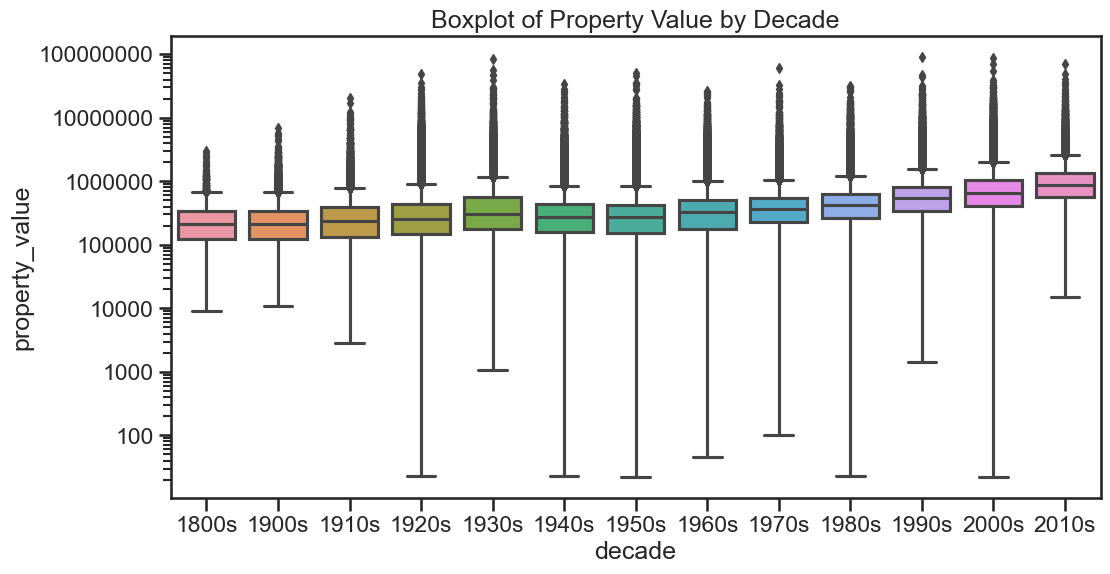

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter



# Boxplot with adjusted y-axis ticks
plt.figure(figsize=(12, 6))
sns.boxplot(x='decade', y='property_value', data=train)
plt.yscale('log')  # Use a logarithmic scale for better readability
plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Disable scientific notation
plt.title('Boxplot of Property Value by Decade')
plt.show()


 
### 7. Run the appropriate statistical tests where needed.
 
 

###### Question 1: is there a relationship between deacde and property_value?

In [ ]:
Assume normal distribution and equal variances?

Hypothesis:

$H_0$: The mean property_value for each decade is the same.

$H_a$: There are significant differences between the mean property_value for at least two decades.

In [12]:
α = 0.05

In [30]:
from scipy.stats import f_oneway

# Assuming your DataFrame is named 'train' and you have 'decade' and 'property_value' columns
decades = sorted(train['decade'].unique())

# Create a list to store the property values for each decade
property_values_by_decade = []

# Select property value for each decade and append to the list
for d in decades:
    mean_value = train[train['decade'] == d]['property_value']
    property_values_by_decade.append(mean_value)

# Perform ANOVA
result = f_oneway(*property_values_by_decade)

# Print ANOVA results
print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)


ANOVA F-statistic: 7536.303867316612
ANOVA p-value: 0.0


In [35]:
if p < α:
    print('We can reject our null hypothesis and suggest that there is significant difference in mean property_values for at least two decades')
else:
    print('We fail to reject the null hypothesis')

We can reject our null hypothesis and suggest that there is significant difference in mean property_values for at least two decades


#### 8. What independent variables are correlated with the dependent variable, home value?
 

 
#### 9. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?
 
 

#### 10. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.
 
 

#### 11. Explore your dataset with any other visualizations you think will be helpful.
 
 
 